# Challenge Técnico (Core)

Objetivo: Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

Pasos del Challenge:

 1. Registro en Kaggle y Elección de Competencia:

- Los estudiantes deben registrarse en Kaggle si no lo han hecho aún.
- Elegir una competencia activa que esté alineada con los conocimientos y técnicas aprendidas (por ejemplo, una competencia de clasificación o regresión).


 2. Carga y Exploración Inicial de Datos:

- Descargar el dataset de la competencia.
- Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
- Identificar y documentar valores faltantes y outliers.


 3. Análisis Exploratorio de Datos (EDA):

- Calcular estadísticas descriptivas básicas.
- Crear visualizaciones para entender la distribución de las variables y sus relaciones.
- Detectar y tratar valores faltantes y outliers.


 4. Preprocesamiento de Datos:

- Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).
- Dividir el dataset en conjuntos de entrenamiento y prueba.


 5. Implementación de Modelos y Benchmark:

- Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.
- Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
- Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.
- Comparar el rendimiento de los modelos utilizando métricas adecuadas.
 

 6. Documentación y Entrega:

- Documentar todo el proceso en un notebook de Jupyter.
- Subir el notebook, los resultados y cualquier script adicional a un repositorio de GitHub.
- Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

# Carga y Exploración Inicial de Datos

In [2]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/train_challenge.csv')
print(df.head()) 

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [4]:
print(df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [5]:
df['CryoSleep'] = df['CryoSleep'].astype('bool')
print(df.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
#Tenemos varios datos nulos
print(df.duplicated().sum())

0


In [7]:
#No tenemos duplicados

# Análisis Exploratorio de Datos (EDA)

In [8]:
print(df.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


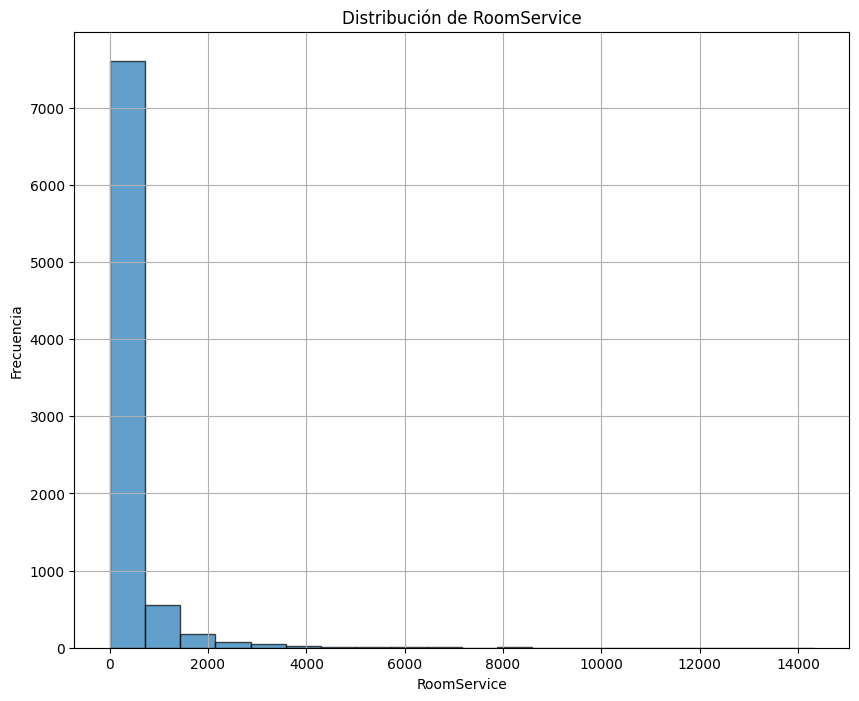

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Empezaré con algunos gráficos para entender mejor
plt.figure(figsize=(10, 8))
plt.hist(df['RoomService'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de RoomService')
plt.xlabel('RoomService')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [10]:
import plotly.express as px

fig = px.box(df, y = 'FoodCourt', title='Distribución de FoodCourt')
fig.show()

In [11]:
#Veo varios posibles outliers, pero por la cantidad de datos que son, seguramente son falsos outliers

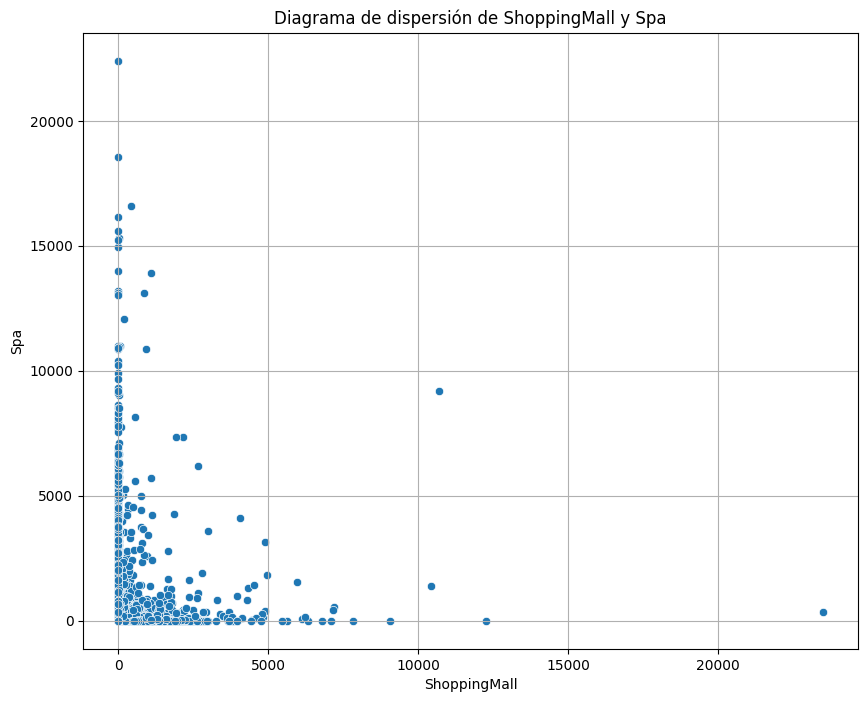

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'ShoppingMall', y = 'Spa', data = df)
plt.title('Diagrama de dispersión de ShoppingMall y Spa')
plt.xlabel('ShoppingMall')
plt.ylabel('Spa')
plt.grid(True)
plt.show()

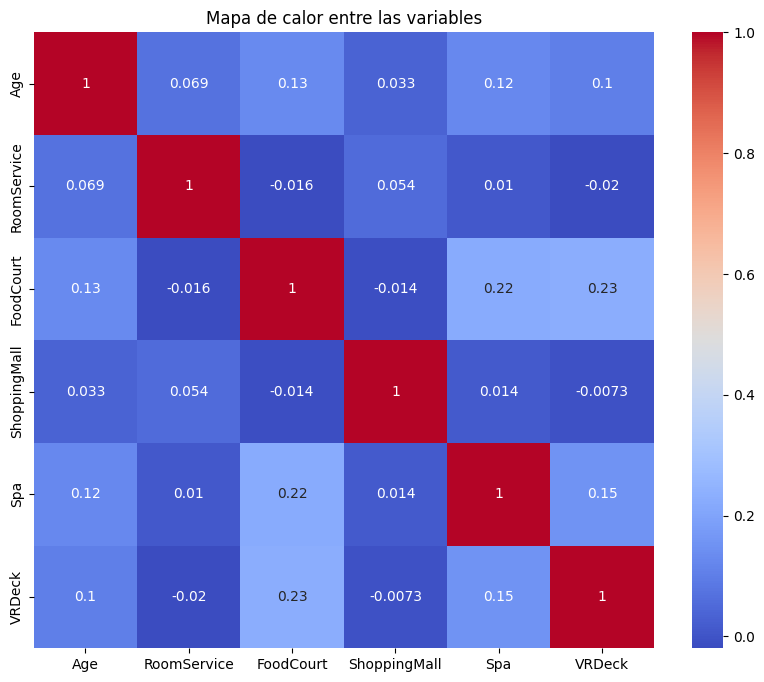

In [13]:
#Lo que puedo concluir en esto es que los valores se concentran en valores bajos.
#No veo una correlación porque para muchos valores de Spa tenemos bajos valores de ShoppingMall
plt.figure(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [14]:
#No veo una relación muy fuerte en ninguno de los datos. 

# Preprocesamiento de Datos

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/train_challenge.csv')

#Selecciono la variable objetivo y la separo
X = df.drop('Transported', axis = 1) #Con esto selecciono todas las columnas, excepto charges
y = df['Transported'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Implementación de Modelos y Benchmark

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

#Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), #Con esto llamo al preprocesamiento hecho más arriba
    ('classifier', LogisticRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

#Entreno los modelos 
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

#Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

#También puedo comparar el accuracy de cada uno
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

#Puedo hacer un diccionario para que sea más facil mostrarlo
results = {
    'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

       False       0.78      0.75      0.77       861
        True       0.77      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       0.76      0.77      0.77       861
        True       0.77      0.77      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       861
        True       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg  

In [17]:
from sklearn.model_selection import cross_val_score

# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression - Mean Accuracy:", scores_LR.mean())
print("Logistic Regression - Std Accuracy:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors - Mean Accuracy:", scores_KNN.mean())
print("K-Nearest Neighbors - Std Accuracy:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree - Mean Accuracy:", scores_DT.mean())
print("Decision Tree - Std Accuracy:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest - Mean Accuracy:", scores_RF.mean())
print("Random Forest - Std Accuracy:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost - Mean Accuracy:", scores_XGB.mean())
print("XGBoost - Std Accuracy:", scores_XGB.std())


Logistic Regression - Mean Accuracy: 0.7914891724291306
Logistic Regression - Std Accuracy: 0.010919566072056132
K-Nearest Neighbors - Mean Accuracy: 0.7684830022394739
K-Nearest Neighbors - Std Accuracy: 0.019616476014891894
Decision Tree - Mean Accuracy: 0.7818539532141362
Decision Tree - Std Accuracy: 0.00882865874766066
Random Forest - Mean Accuracy: 0.7858804545148927
Random Forest - Std Accuracy: 0.0076194758114630735
XGBoost - Mean Accuracy: 0.7880371762977828
XGBoost - Std Accuracy: 0.009498666060737482


In [18]:
#Lo que puedo ver acá es que Logistic Regression tiene la mejor Accuracy con 0.7915
#Su desviación de 0.0109 me indica que es consistente entre los pliegues
#Ahora optimizaré para ver si puedo mejorar y elegir el mejor modelo
from sklearn.model_selection import GridSearchCV
# Parámetros 
param_grid_LR = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

param_grid_KNN = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

param_grid_DT = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
}

param_grid_RF = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_XGB = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

#Hago el GridSearch para cada modelo
grid_LR = GridSearchCV(pipeline_LR, param_grid_LR, cv=5, scoring='accuracy')
grid_KNN = GridSearchCV(pipeline_KNN, param_grid_KNN, cv=5, scoring='accuracy')
grid_DT = GridSearchCV(pipeline_DT, param_grid_DT, cv=5, scoring='accuracy')
grid_RF = GridSearchCV(pipeline_RF, param_grid_RF, cv=5, scoring='accuracy')
grid_XGB = GridSearchCV(pipeline_XGB, param_grid_XGB, cv=5, scoring='accuracy')

#Ahora entreno los modelos
grid_LR.fit(X_train, y_train)
grid_KNN.fit(X_train, y_train)
grid_DT.fit(X_train, y_train)
grid_RF.fit(X_train, y_train)
grid_XGB.fit(X_train, y_train)

#Ahora veo los mejores parametros
print("Best parameters for Logistic Regression:", grid_LR.best_params_)
print("Best cross-validated accuracy for Logistic Regression:", round(grid_LR.best_score_, 4))

print("Best parameters for K-Nearest Neighbors:", grid_KNN.best_params_)
print("Best cross-validated accuracy for K-Nearest Neighbors:", round(grid_KNN.best_score_, 4))

print("Best parameters for Decision Tree:", grid_DT.best_params_)
print("Best cross-validated accuracy for Decision Tree:", round(grid_DT.best_score_, 4))

print("Best parameters for Random Forest:", grid_RF.best_params_)
print("Best cross-validated accuracy for Random Forest:", round(grid_RF.best_score_, 4))

print("Best parameters for XGBoost:", grid_XGB.best_params_)
print("Best cross-validated accuracy for XGBoost:", round(grid_XGB.best_score_, 4))


Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validated accuracy for Logistic Regression: 0.7926
Best parameters for K-Nearest Neighbors: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best cross-validated accuracy for K-Nearest Neighbors: 0.7777
Best parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Best cross-validated accuracy for Decision Tree: 0.785
Best parameters for Random Forest: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validated accuracy for Random Forest: 0.7879
Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 50, 'classifier__subsample': 0.6}
Best cross-validated accuracy for XGBo

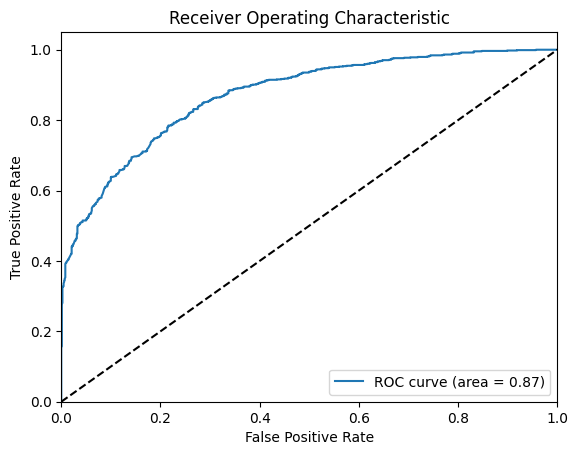

In [19]:
#El mejor modelo luego de la optimización es el XGBoost con un rendimiento del 79.99%
#Tener en cuenta que esto es sin eliminar posibles outliers
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predecir probabilidades con el modelo XGBoost optimizado
y_pred_prob = grid_XGB.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
#Calculo la curva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Calculo AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
#Es congiable para distinguir entre clases. Su optimización mejoró su predicción.